<a href="https://colab.research.google.com/github/RotemDror1/rotemdprojects/blob/main/part_4_Rotem_Dror.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



   **תיאור הפרוייקט** - הפרוייקט מקבל נתונים של אורז מסויים וקובע האם הוא אורז מסוג יסמין או אורז מסוג גונן

שאלת החקר** - האם המכונה יכולה להבדיל בין אורז יסמין לאורז גונן

   **איסוף נתונים** -  הנתונים נאספו מדאטאסט https://www.kaggle.com/datasets/mssmartypants/rice-type-classification

 הדאטאסט כולל את כל התכונות הללו של האורז:
 id
Area
MajorAxisLength
MinorAxisLength
Eccentricity
ConvexArea
EquivDiameter
Extent
Perimeter
Roundness
AspectRation
Class





















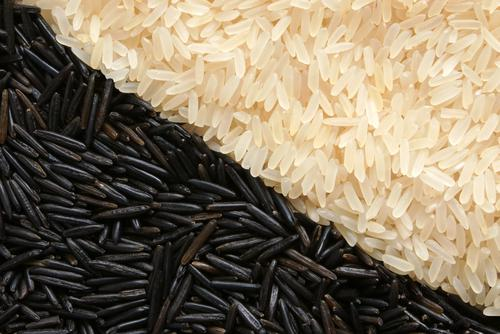

In [ ]:

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
##confusion_matrix נשתמש בספרייה זו בכדי להציג
import pandas as pd
##נשתמש בספרייה זו לסידור ולסינון המידע
from sklearn import svm
##svm נייבא
from sklearn.svm import SVC
##SVC נייבא
import matplotlib.pyplot as plt
## נשתמש בספרייה זו בכדי ליצור תרשימים
from sklearn.model_selection import train_test_split
## נשתמש בספרייה זו בכדי להפריד לקבוצות אימון ובקרה
import seaborn as sns
##matplotlib ספרייה גרפית המבוססת על
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, r2_score

הדטה סט שלי כולל כ12 עמודות וכ18185 שורות אבל הבנתי שכדי לגרום לביצועים הטובים
ביותר של המכונה אצטרך לנקות ולקצר את המידע.
הדבר הראשון שעשיתי הוא לקלוט את
dfהדטה סט ולהגדיר אותו כ

והראתי את כל ההמספרים והממוצעים של כל תכונה ותא לאחר מכן בדקתי שלא חסרה אף שורה או נתון באחת התכונות. תא אחרי זה רציתי לבדוק את כל ההשפעות של כל תכונה על סוג האורז כי אם לאחת התכונות ההשפעה קטנה מאוד אוכל למחוק את העמודה ובך לשפר את הביצועים ואכן מצאתי עמודה אשר השפעתה קטנה מאוד על סוג האורז והיא אורך הציר הראשי ולכן מחקתי את העמודה הזו
לפני המחיקה הראתי גרף המתאר את השפעת תכונה זו על סוג האורז.

 לאחר מכן הורדתי שורות מסויימות מהדטה סט מפני שכל פעם שעשיתי שינוי לקח לי הרבה זמן להריץ את התוכנית וגם בכדי לגרום לביצועים טובים יותר אז חיפשתי שורה באינטרנט אשר מוחקת טווח של שורות מסויימות  והשתמשתי בה בכדי להקטין את הגודל של הדטה סט, הדטה סט המקורי היה 18185 שורות לאחר כמה הרצות ובדיקות של כמה שורות להוריד בלי לפגוע בתוכן של הדטה סטבסוף החלטתי להשאיר 4500 שורות 1500 מההתחלה 1500 באמצע ו 1500 בסוף ובשביל בדיקה שלא פגעת בשום נתון הצגתי גרף המתאר את הבדלי הכמות בין שני הסוגים לפני ולאחר הורדת השורות וגם הראתי כמה יש מכל סוג לפני ואחרי ההורדה בצורה מספרית בכדי לבדוק שהיחס לא נפגע.

לאחר מכן חיפשתי עוד איך לקצר ו"לנקות" את המידע והחלטתי להסיר את עמודת המספור מפני שמטרתה למספר את האורז תכונה זו חיונית לאדם אשר קורא את המידע אך דבר זה לא חיוני לעבודה ואף יצא אובר פיטינג
 ואחרי זה ניקיתי עוד את המידע בעזרת כמה פקודות מפנדס,  מחקתי את כל הכפילויות שיש


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/smallrice.csv')
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
df=df.drop(['MinorAxisLength'], axis=1)

In [ ]:
df=df.drop(['EquivDiameter'], axis=1)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,18185.0,9093.000000,5249.701658,1.000000,4547.000000,9093.000000,13639.000000,18185.000000
Area,18185.0,7036.492989,1467.197150,2522.000000,5962.000000,6660.000000,8423.000000,10210.000000
MajorAxisLength,18185.0,151.680754,12.376402,74.133114,145.675910,153.883750,160.056214,183.211434
Eccentricity,18185.0,0.915406,0.030575,0.676647,0.891617,0.923259,0.941372,0.966774
ConvexArea,18185.0,7225.817872,1502.006571,2579.000000,6125.000000,6843.000000,8645.000000,11008.000000
Extent,18185.0,0.616653,0.104389,0.383239,0.538530,0.601194,0.695664,0.886573
Perimeter,18185.0,351.606949,29.500620,197.015000,333.990000,353.088000,373.003000,508.511000
Roundness,18185.0,0.707998,0.067310,0.174590,0.650962,0.701941,0.769280,0.904748
AspectRation,18185.0,2.599081,0.434836,1.358128,2.208527,2.602966,2.964101,3.911845
Class,18185.0,0.549079,0.497599,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   Extent           18185 non-null  float64
 6   Perimeter        18185 non-null  float64
 7   Roundness        18185 non-null  float64
 8   AspectRation     18185 non-null  float64
 9   Class            18185 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 1.4 MB


In [ ]:
df.corr()[['Class']].sort_values('Class',ascending=False)

,Class
Class,1.000000
AspectRation,0.832563
Eccentricity,0.788636
MajorAxisLength,-0.147741
Extent,-0.303440
Perimeter,-0.533274
id,-0.808591
ConvexArea,-0.814214
Area,-0.816589
Roundness,-0.831759


In [ ]:
df=df.drop(['MajorAxisLength'], axis=1)

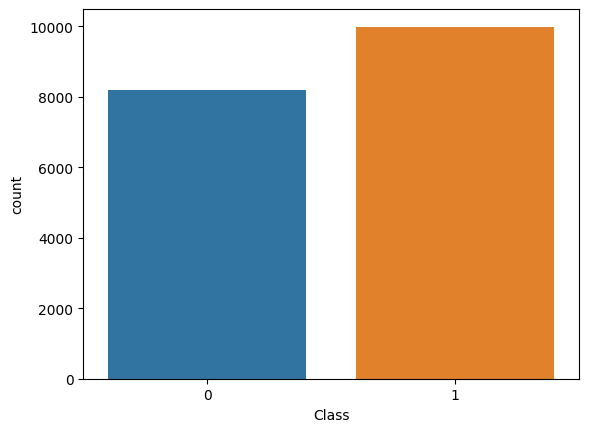

In [ ]:
sns.countplot(x ='Class', data = df)
plt.show()

In [ ]:
df['Class'].value_counts()

1    9985
0    8200
Name: Class, dtype: int64

In [ ]:
df = df.drop(labels=range(1500, 8000), axis=0)


In [ ]:
df = df.drop(labels=range(9500, 16685), axis=0)

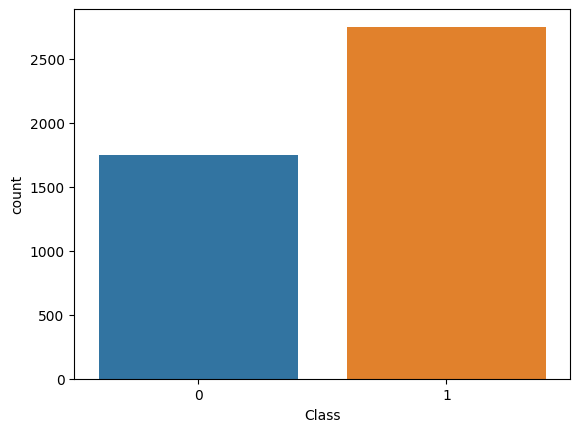

In [ ]:
sns.countplot(x ='Class', data = df)
plt.show()


In [ ]:
df['Class'].value_counts()


1    2753
0    1747
Name: Class, dtype: int64

In [ ]:
df = df.drop_duplicates()
df.shape


(4500, 9)

**הגרפים**

 הגרף הראשון נועד כדי להראות את השפעת השטח הקמור על סוג האורז כפי שניתן לראות השפעת השטח הקמור על סוג האורז היא גדולה מאוד. מהגרף ניתן לראות שאם השטח קטן מ6000 אז האורז הוא מסוג יסמין ואם השטח מעל 8000 אז האורז מסוג גונן.

 הגרף השני מראה את הקשר בין עיגוליות האורז לבין סוגו בגרף זה ניתן לראות בצורה ברורה מאוד את השוני בין הסוגים

 הגרף השלישי הוא הגרף המפורט ביותר שמצאתי והחלטתי להציג השפעת כל התכונות על שני סוג האורז



<Axes: xlabel='Class', ylabel='ConvexArea'>

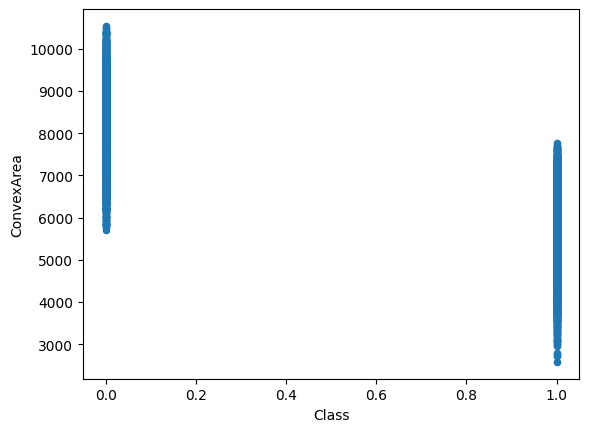

In [ ]:
df.plot(kind = 'scatter', x = 'Class', y = 'ConvexArea')


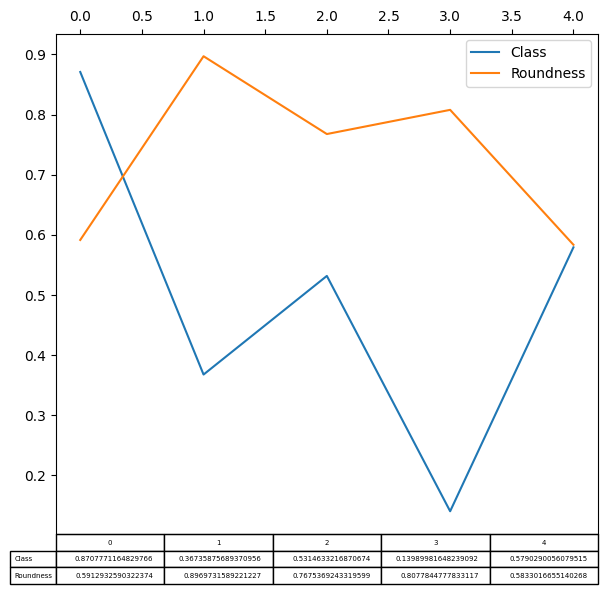

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6.5))

df1 = pd.DataFrame(np.random.rand(5, 2), columns=["Class", "Roundness"])

ax.xaxis.tick_top()

df1.plot(table=True, ax=ax);

In [ ]:
#sns.set_theme(style="ticks")
#sns.pairplot(df,hue="Class")


In [ ]:
df.dropna(axis=0,how="any",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 18184
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4500 non-null   int64  
 1   Area          4500 non-null   int64  
 2   Eccentricity  4500 non-null   float64
 3   ConvexArea    4500 non-null   int64  
 4   Extent        4500 non-null   float64
 5   Perimeter     4500 non-null   float64
 6   Roundness     4500 non-null   float64
 7   AspectRation  4500 non-null   float64
 8   Class         4500 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 351.6 KB


# ניקוי אחרון של המידע

התחלתי בלמחוק את עמודת המספור מפני שהיא יצרה אובר פיטינג וגרם למכונה ל100 אחוזי הצלחה אז מחקתי את העמודה הזו

לאחר מכן הראתי את ההשפעות של כל תכונה על התכונות האחרות בכדי לבדוק האם יש עוד עמודה אשר לא מסייעת ואפשר יהיה למחוק אותה נעזרתי בגרף המתאר את אותו הדבר וראיתי שאין אף תכונה אשר לא מסייעת אפילו להפך ראיתי שיש השפעות של כמעט 100 אחוז בין כמה מהתכונות לתכונות אחרות מה שעוזר למכונה וגורם לביצועים טובים יותר

In [ ]:
df=df.drop(['id'], axis=1)

In [ ]:
df.corr()

,Area,Eccentricity,ConvexArea,Extent,Perimeter,Roundness,AspectRation,Class
Area,1.000000,-0.126560,0.999351,0.100278,0.898831,0.276371,-0.245499,-0.783639
Eccentricity,-0.126560,1.000000,-0.124152,-0.299583,0.240247,-0.854783,0.942145,0.433171
ConvexArea,0.999351,-0.124152,1.000000,0.097130,0.904718,0.262821,-0.242877,-0.781104
Extent,0.100278,-0.299583,0.097130,1.000000,-0.050383,0.349341,-0.328853,-0.201069
Perimeter,0.898831,0.240247,0.904718,-0.050383,1.000000,-0.163407,0.143416,-0.551018
Roundness,0.276371,-0.854783,0.262821,0.349341,-0.163407,1.000000,-0.906474,-0.565237
AspectRation,-0.245499,0.942145,-0.242877,-0.328853,0.143416,-0.906474,1.000000,0.546662
Class,-0.783639,0.433171,-0.781104,-0.201069,-0.551018,-0.565237,0.546662,1.000000


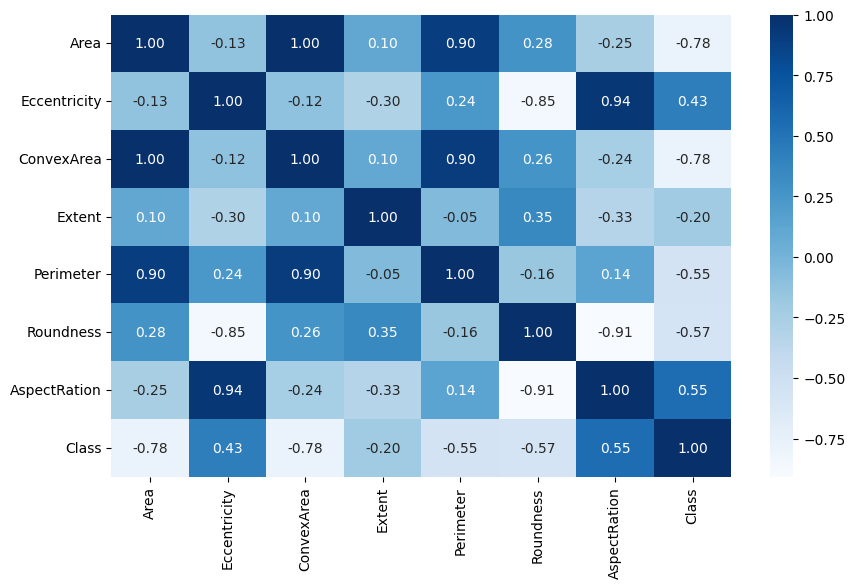

In [ ]:
plt.figure(figsize = (10,6))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.2f');

# שימוש במכונות אס וי אם וקיי אנ אנ:

נגדיר את האיקס ואת הוויי

כדי שנוכל להפריד לקבוצות אימון ובקרה train_test_split נשתמש בפונקצייה

train-נדפיס את מספר הנתונים ב test-נדפיס את מספר הנתונים ב

נירמלתי את הנתונים כדי להקל על המכונה ולגרום לביצועים טובים יותר
כשנירמלתי את הנתונים בפעם הראשונה ראיתי שהמקסימום הוא לא אחד אלא מספר שמאוד קרוב לאחד אז נירמלתי את הנתונים מחדש בתא שאחרי וראיתי שזה הסתדר

#  אס וי אם:
אס וי אם היא מכונה לומדת המסווגת את הנתונים בצורה גרפית

X_train, y_train-על ה  fit נריץ את ה

svm.score בעזרת accuracy נמדוד את ה

נבדוק מה הקרנל עם הביצועים הטובים ביותר

נריץ הכל מחדש עם סוג הקרנל עם הביצועים הטובים ביותר

fit-נריץ מחדש את ה

score-נריץ מחדש את ה

confusiom matrix ניצור

#  קיי אנ אנ:

קיי אנ אנ היא מכונה לומדת המסווגת את המידע לפי קירוב שכנים אנחנו בחרים את כמות השכנים המכונה בודקת (במקרה שלנו) מאיזה סוג אורז רוב השכנים ובכך היא מנחשת את סוג האורז.

אשר מספר השכנים שלו ינוע מ-3 עד -20 בקפיצות של 3 KNeighborsClassifier ניצור את ה

X_train, y_train-על ה  fit נריץ את ה

knn.score בעזרת accuracy נמדוד את ה

שלהם accuracy-את שלנו ואת ה K-נדפיס את כל ערכי ה

המקסימלי ביותר accuracy-בעל ה k-עם ערך ה KNeighborsClassifier-נגדיר מחדש את ה

k=15 המקסימלי ביותר במקרה שלנו הוא  accuracy-בעל ה k- ערך ה

fit-נריץ מחדש את ה

score-נריץ מחדש את ה

confusiom matrix ניצור

#פרספטרון:
 SVMפרספטרון הוא סוג מכונה לומדת הדומה ל

 בשונה מאס בי אמ הפרספטרון מתמקד בסיווג לינארי

X_train, y_trainהתחלתי בלהריץ את פיט על   

y hat הדפסתי את הניחושים ולאחר מכן הגדרתי את הניחושים כ

confusiom matrix יצרתי

והצגתי את כל סוגי הניחושים. לאחר כמה ניסיונות ראיתי שהביצועים הכי טובים הם כשמספר האפילויות הוא 13 אז הרצתי

In [ ]:
np.set_printoptions(precision=3)

In [ ]:
X = df.drop(['Class'],axis=1).to_numpy()
y = df['Class'].to_numpy()
print("start: ",X.shape, y.shape)


start:  (4500, 7) (4500,)


In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=41)
print("train: ", X_train.shape, y_train.shape)

print("test:  " , X_test.shape, y_test.shape)


train:  (3600, 7) (3600,)
test:   (900, 7) (900,)


In [ ]:
scaler = MinMaxScaler()
print('Max: ',X_train.max())
print('Min: ', X_train.min())


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  10544.0
Min:  0.1745901779
Max:  1.0000000000000004
Min:  0.0


In [ ]:
scaler = MinMaxScaler()
print('Max: ',X_train.max())
print('Min: ', X_train.min())


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000004
Min:  0.0
Max:  1.0
Min:  0.0


In [ ]:
for kernel in ['linear','poly','rbf']:
  svm2 = SVC(kernel=kernel,C=1)
  svm2.fit(X_train, y_train)
  score = svm2.score(X_test,y_test)
  print("kernel: {} score: {}".format(kernel,score))

kernel: linear score: 0.9522222222222222
kernel: poly score: 0.96
kernel: rbf score: 0.9611111111111111


In [ ]:
best_kernel = 'poly'
svm2 = SVC(kernel=best_kernel,C=1)
svm2.fit(X_train, y_train)
score = svm2.score(X_test,y_test)
print("kernel: {} score: {}".format(best_kernel,score))

kernel: poly score: 0.96


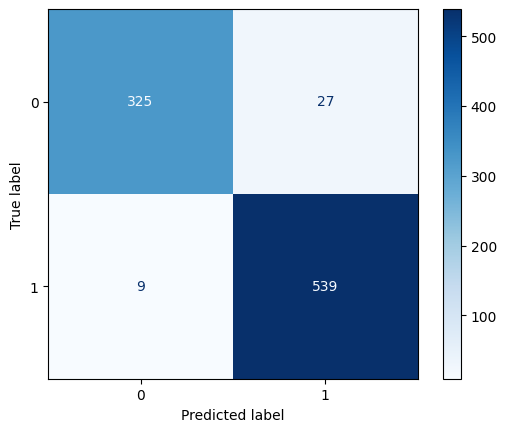

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm2, X_test, y_test,values_format="d",cmap='Blues');

In [ ]:
pred2 = svm2.predict(X_test)
print(classification_report(y_test,pred2,digits=4))

              precision    recall  f1-score   support

           0     0.9731    0.9233    0.9475       352
           1     0.9523    0.9836    0.9677       548

    accuracy                         0.9600       900
   macro avg     0.9627    0.9534    0.9576       900
weighted avg     0.9604    0.9600    0.9598       900



In [ ]:

for k in range(3,20,1):
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn1.fit(X_train,y_train)
    score = knn1.score(X_test, y_test)
    print("k = {} score test: {}".format(k,score))


k = 3 score test: 0.9544444444444444
k = 4 score test: 0.9522222222222222
k = 5 score test: 0.9511111111111111
k = 6 score test: 0.95
k = 7 score test: 0.9511111111111111
k = 8 score test: 0.9533333333333334
k = 9 score test: 0.9533333333333334
k = 10 score test: 0.9533333333333334
k = 11 score test: 0.9577777777777777
k = 12 score test: 0.9588888888888889
k = 13 score test: 0.9577777777777777
k = 14 score test: 0.96
k = 15 score test: 0.9611111111111111
k = 16 score test: 0.9633333333333334
k = 17 score test: 0.9588888888888889
k = 18 score test: 0.9611111111111111
k = 19 score test: 0.9588888888888889


In [ ]:

best_k = 18
knn1 = KNeighborsClassifier(n_neighbors = best_k)
knn1.fit(X_train,y_train)

score = knn1.score(X_test, y_test)

print("k = {} score test: {}".format(best_k,score))

k = 18 score test: 0.9611111111111111


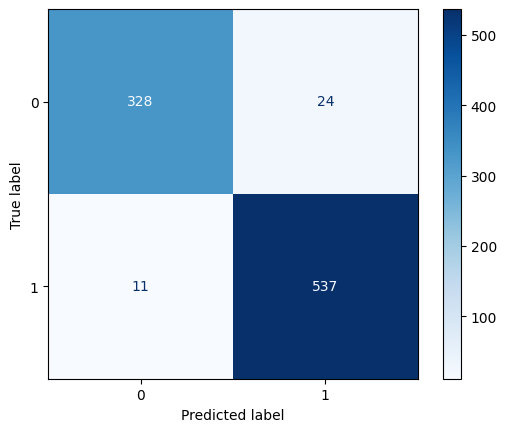

In [ ]:

ConfusionMatrixDisplay.from_estimator(knn1, X_test, y_test,values_format="d",cmap='Blues');

In [ ]:
pred1 = knn1.predict(X_test)
print(classification_report(y_test,pred1,digits=4))

              precision    recall  f1-score   support

           0     0.9676    0.9318    0.9493       352
           1     0.9572    0.9799    0.9684       548

    accuracy                         0.9611       900
   macro avg     0.9624    0.9559    0.9589       900
weighted avg     0.9613    0.9611    0.9610       900



In [ ]:
clf = Perceptron(tol=1e-3, random_state=0,verbose=0,n_iter_no_change=13)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
y_hat = clf.predict(X_test)
scores= metrics.accuracy_score(y_test,y_hat)

0.9088888888888889


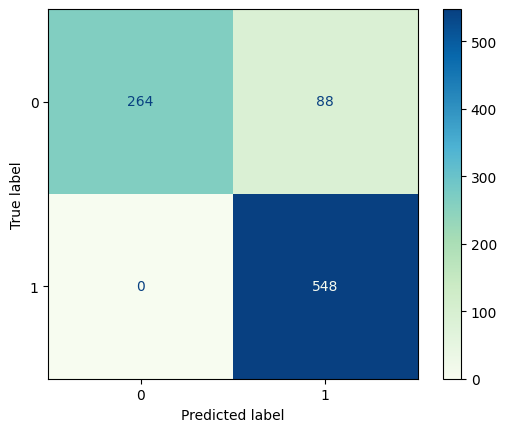

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,values_format="d",cmap="GnBu");

In [ ]:
prediction_3=clf.predict(X_test)
print(classification_report(y_test,prediction_3,digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.7500    0.8571       352
           1     0.8616    1.0000    0.9257       548

    accuracy                         0.9022       900
   macro avg     0.9308    0.8750    0.8914       900
weighted avg     0.9158    0.9022    0.8989       900



#רגרסיה לוגיסטית:
גרסיה לוגיסטית היא רגרסיה בה המשתנה התלוי הוא בינארי – כלומר, יש בו רק שתי קטגוריות המוצגות באמצעות הערכים 0 ו-1.


In [ ]:
#X=df[[	'Area',	'AspectRation', 'MinorAxisLength',  'Eccentricity',  'ConvexArea',  'EquivDiameter','Extent'  ,'Perimeter',  'Roundness']].to_numpy()
X=df[['Area',	'Perimeter']].to_numpy()
y=1*(df['Class']==1).to_numpy()
print(X.shape,y.shape)

(4500, 2) (4500,)


In [ ]:
reg = LogisticRegression(penalty='l2')
reg.fit(X,y)
ww = reg.coef_
print(ww.shape,ww)
w_sk = reg.coef_[0]
b_sk = reg.intercept_[0]
print(w_sk,b_sk)

(1, 2) [[-0.007  0.141]]
[-0.007  0.141] 0.0006226623857360828


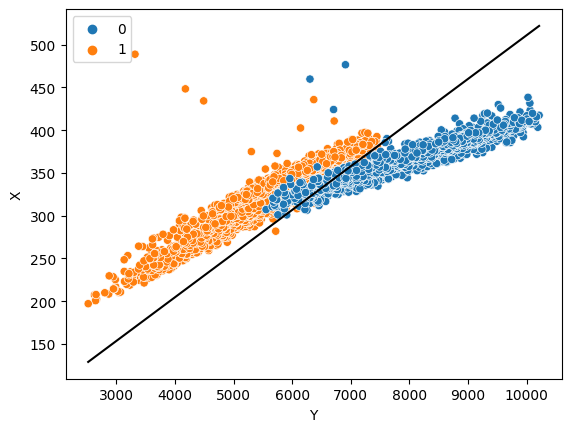

In [ ]:
plt.xlabel('Y')
plt.ylabel('X')
mg = -w_sk[0]/w_sk[1]
bg = -b_sk/w_sk[1]
xg = np.array([X[:,0].min(),X[:,0].max()])
yg = mg * xg + bg
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.plot(xg,yg,color="black");

In [ ]:
pred2 = reg.predict(X)
print(classification_report(y_true=y, y_pred=pred2))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1747
           1       0.95      0.98      0.96      2753

    accuracy                           0.96      4500
   macro avg       0.96      0.95      0.95      4500
weighted avg       0.96      0.96      0.95      4500



#רפלקציה:

כששמעתי שאנחנו הולכים ללמוד על מכונת למידה  בשפת פייתון (שלא הכרתי בכלל) לא כל כך הבנתי מה זה וטיפה חששתי מללמוד נושא חדש לגמרי אך מהר מאוד לאחר ההסבר הראשון על מה נלמד לעשות הבנתי שהדברים שאנו הולכים לעשות בפרויקט הזה יהיו מעניינים ושימושיים, וכך באמת היה אני יוצא מהפרויקט הזה עם ידע שימושי מאוד לעולם של היום ונסיון בלידמה ועבודה עצמית. לסיכום למדתי הרבה בפרויקט הזה ואני מרוצה מזה שבחרתי מגמה זו .

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0